In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
# Read csv 

df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Checking for null data

nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [ ]:
# Dropping null data 

df = df.dropna(how='all')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75


In [ ]:
# Creating Total Sales Column 

df['Total Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] + df['Global_Sales']
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,71.65
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,66.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,62.75


In [113]:
# Finding Top 5 Titles

df.groupby('Name').sum().sort_values(by=['Total Sales'], ascending = False).head(5).round()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
Name,,,,,,,,
Wii Sports,1,2006.0,41.0,29.0,4.0,8.0,83.0,165.0
Grand Theft Auto V,2182,10069.0,23.0,23.0,1.0,8.0,56.0,112.0
Super Mario Bros.,203,3984.0,32.0,5.0,7.0,1.0,45.0,91.0
Tetris,162,3977.0,26.0,3.0,6.0,1.0,36.0,72.0
Mario Kart Wii,3,2008.0,16.0,13.0,4.0,3.0,36.0,72.0


In [44]:
# Pivot Top 5 Titles

title_pivot = df.pivot_table(index =['Name'],
                       values =['Total Sales'],
                       aggfunc ='sum').sort_values(by='Total Sales', ascending = False).head(5).round()
title_pivot

,Total Sales
Name,
Wii Sports,165.0
Grand Theft Auto V,112.0
Super Mario Bros.,91.0
Tetris,72.0
Mario Kart Wii,72.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Grand Theft Auto V'),
  Text(2, 0, 'Super Mario Bros.'),
  Text(3, 0, 'Tetris'),
  Text(4, 0, 'Mario Kart Wii')])

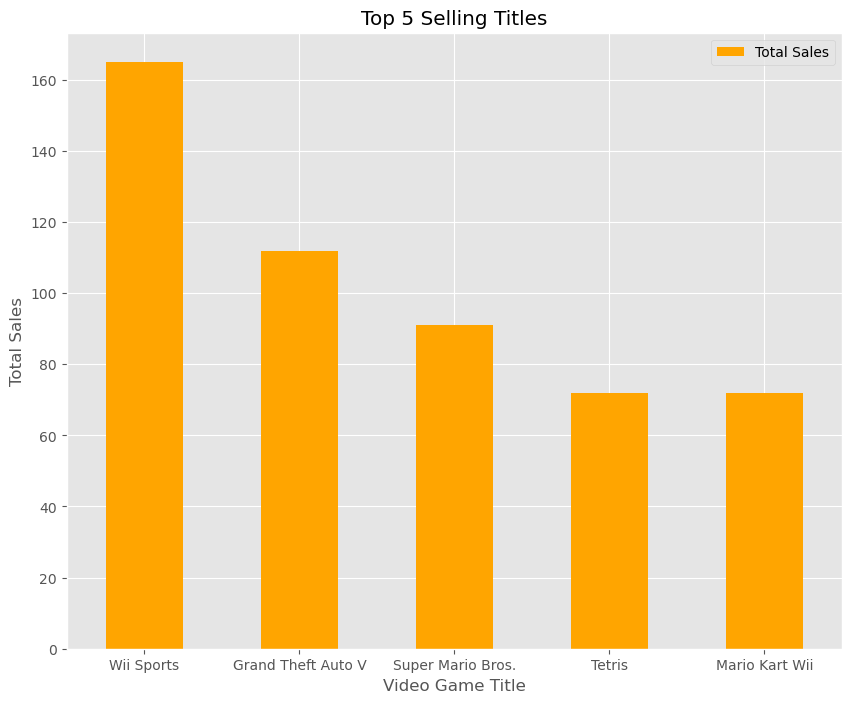

In [148]:
# Plot Pivot (Top 5 Titles)

title_pivot.plot(kind='bar', 
                 title = 'Top 5 Selling Titles', 
                 ylabel = 'Total Sales',
                 xlabel = 'Video Game Title', 
                 figsize = (10,8),
                 color = 'orange'
                )

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

In [61]:
# Top Selling by Genre

df.groupby('Genre').sum().round().head(5).sort_values(by=['Total Sales'], ascending=False).round()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
Genre,,,,,,,,
Action,26441383,6531731.0,878.0,525.0,160.0,187.0,1751.0,3501.0
Platform,6137545,1755347.0,447.0,202.0,131.0,52.0,831.0,1662.0
Misc,14889052,3432412.0,410.0,216.0,108.0,75.0,810.0,1619.0
Fighting,6484242,1675871.0,224.0,101.0,87.0,37.0,449.0,898.0
Adventure,14831165,2562375.0,106.0,64.0,52.0,17.0,239.0,478.0


In [43]:
# Pivot Top 5 Genres

genre_pivot = df.pivot_table(index =['Genre'],
                       values =['Total Sales'],
                       aggfunc ='sum').sort_values(by='Total Sales', ascending = False).head(5).round()
genre_pivot

,Total Sales
Genre,
Action,3501.0
Sports,2661.0
Shooter,2074.0
Role-Playing,1855.0
Platform,1662.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform')])

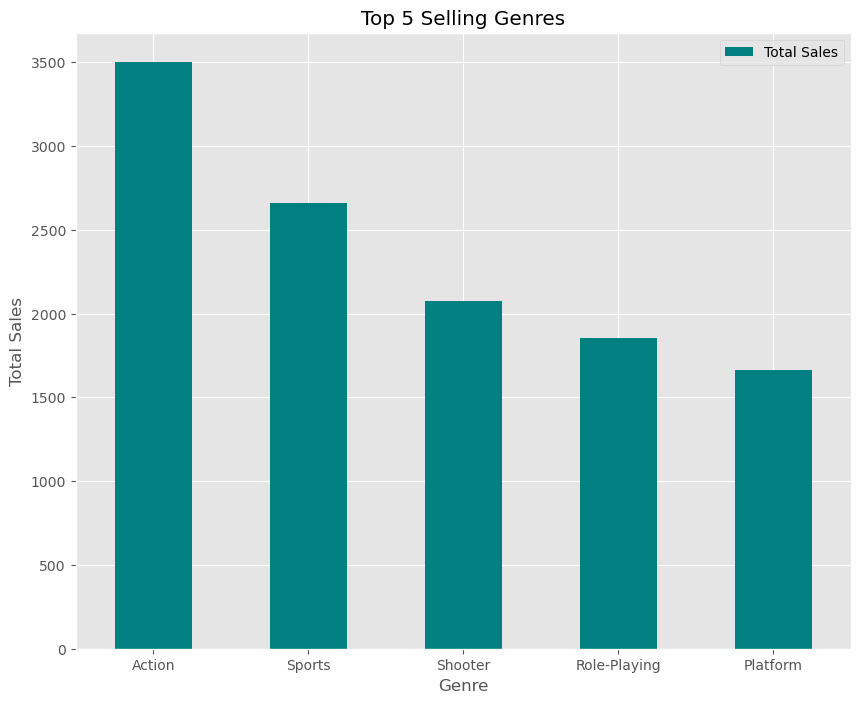

In [95]:
# Plot Pivot (Top 5 Genres)

genre_pivot.plot(kind='bar',
                title = 'Top 5 Selling Genres', 
                 ylabel = 'Total Sales',
                 xlabel = 'Genre', 
                 figsize = (10,8),
                 color = 'teal',
                )

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

In [62]:
# Top 5 Publishers 

df.groupby('Publisher').sum().sort_values(by=['Total Sales'], ascending = False).head(5).round()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
Publisher,,,,,,,,
Nintendo,2714164,1394666.0,817.0,419.0,455.0,95.0,1787.0,3573.0
Electronic Arts,7140412,2686562.0,595.0,371.0,14.0,130.0,1110.0,2220.0
Activision,6368325,1938979.0,430.0,216.0,7.0,75.0,727.0,1455.0
Sony Computer Entertainment,4105604,1367034.0,265.0,188.0,74.0,80.0,608.0,1215.0
Ubisoft,6964728,1843194.0,253.0,163.0,8.0,50.0,475.0,949.0


In [42]:
# Pivot Top 5 Publishers

publisher_pivot = df.pivot_table(index =['Publisher'],
                       values =['Total Sales'],
                       aggfunc ='sum').sort_values(by='Total Sales', ascending = False).head(5).round()

publisher_pivot

,Total Sales
Publisher,
Nintendo,3573.0
Electronic Arts,2220.0
Activision,1455.0
Sony Computer Entertainment,1215.0
Ubisoft,949.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft')])

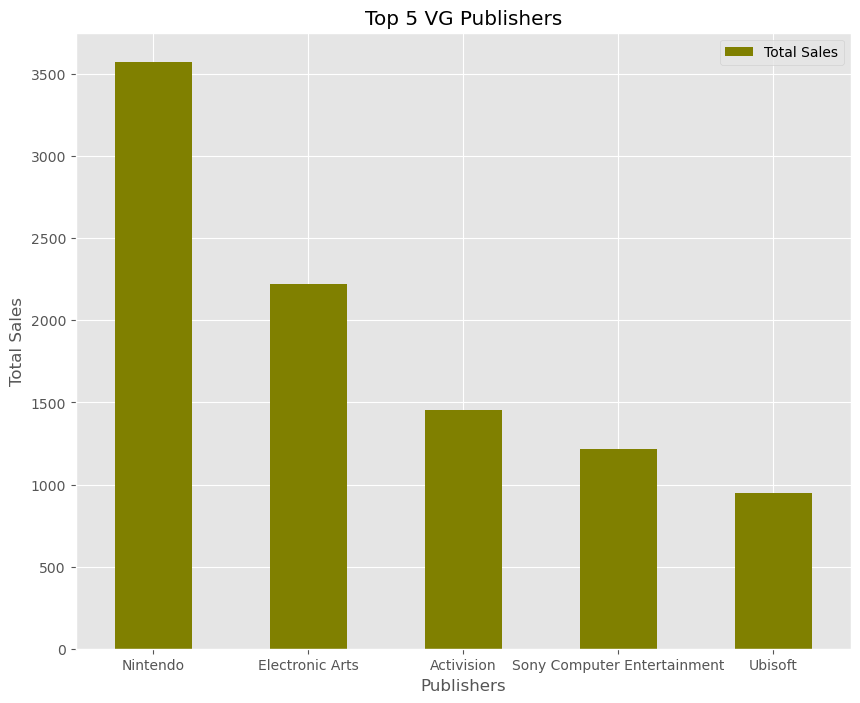

In [79]:
# Plot Pivot (Top 5 Titles)

publisher_pivot.plot(kind='bar',
                title = 'Top 5 VG Publishers', 
                 ylabel = 'Total Sales',
                 xlabel = 'Publishers', 
                 figsize = (10,8),
                color = 'olive'
                )

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

In [145]:
# What is Nintendo's top selling platform for video games?

df.groupby(['Publisher','Platform', 'Total Sales']).sum().sort_values(by=['Total Sales'], ascending = False).head(1)

,,,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,Platform,Total Sales,,,,,,,
Nintendo,Wii,165.48,1,2006.0,41.49,29.02,3.77,8.46,82.74


In [ ]:
# What VG platforms had the least sales overall? - Limit 5 

platform_pivot = df.pivot_table(index =['Platform'],
                       values =['Total Sales'],
                       aggfunc ='sum').sort_values(by='Total Sales', ascending = True).head(5).round()

platform_pivot.head()

,Total Sales
Platform,
PCFX,0.0
GG,0.0
3DO,0.0
TG16,0.0
WS,3.0
